# Desafio 04

Assim como foi feito no trabalho prático, o objetivo desse exercício é classificar imagens
pelo uso do Deep Learning (Keras e Tensorflow). 

Dessa vez iremos utilizar dados de
imagens de flores para ensinar à rede as novas classes que precisará reconhecer.
Vamos usar um arquivo de fotos de flores licenciadas da creative-commons do Google.

O conjunto de dados usado neste exemplo é distribuído como diretórios de imagens,
com uma classe de imagem por diretório.



In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img,img_to_array
import IPython.display as display
import PIL as Image
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
!rm -rf views
!mkdir ./views
!nvidia-smi
keras.backend.clear_session()

Mon Apr 26 20:43:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
dataPath = keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos',untar=True)
dataPath = pathlib.Path(dataPath)
display.clear_output()
dataPath

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
dataCount = len(list(dataPath.glob('*/*.jpg')))
print('Total: ',dataCount)

Total:  3670


In [9]:
classNames = np.array([item.name for item in dataPath.glob('*') if item.name !='LICENSE.txt'])
for name in classNames:
  count = len(list(dataPath.glob(name+'/*')))
  p = str(dataPath.absolute())+'/'+name+'/'
  print(count,':\t',name.strip(),'\t(',p,')')

699 :	 sunflowers 	( /root/.keras/datasets/flower_photos/sunflowers/ )
799 :	 tulips 	( /root/.keras/datasets/flower_photos/tulips/ )
633 :	 daisy 	( /root/.keras/datasets/flower_photos/daisy/ )
641 :	 roses 	( /root/.keras/datasets/flower_photos/roses/ )
898 :	 dandelion 	( /root/.keras/datasets/flower_photos/dandelion/ )


## Pré-processamento

In [10]:
def show_flowers(show="",width=224,height=224, images_path ='/root/.keras/datasets/flower_photos/'):  
  cols = 10
  limit = 50
  index = 0
  images = list()
  vertical_images=[]
  images_path = images_path+show+'/'
  for path in os.listdir(images_path):
    index=index+1
    if index%limit==0:
        break
    image = load_img(images_path+path, target_size=(width,height))
    image= img_to_array(image) #to numpy
    image_height, image_width, image_channel = image.shape
    horizontal_side = np.ones((image_height, 5,  image_channel), dtype=np.float32)*255    
    images.append(image)
    images.append(horizontal_side)
    if index%cols==0:
      horizontal_image = np.hstack((images))
      image_height, image_width, image_channel = horizontal_image.shape
      vertical_side = np.ones((5, image_width,  image_channel), dtype=np.float32)*255
      vertical_images.append(horizontal_image)
      vertical_images.append(vertical_side)
      images=list()
  gallery=np.vstack((vertical_images)) 
  plt.figure(figsize=(20,30))
  plt.xticks([])
  plt.yticks([])
  plt.title("{} amostragem de {} \nCaminho: {}".format(limit, show.upper(),images_path))
  plt.imshow(gallery.astype(np.uint8))

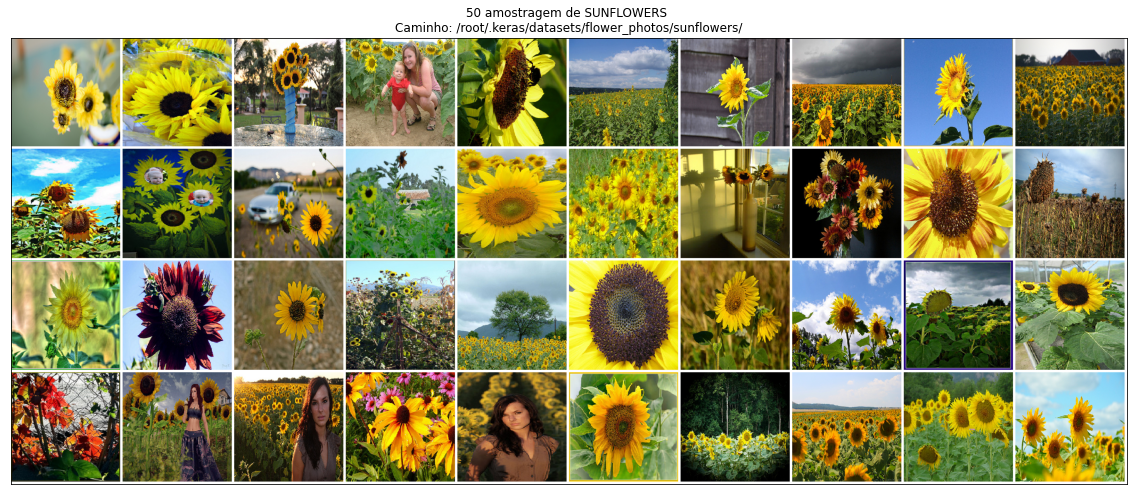

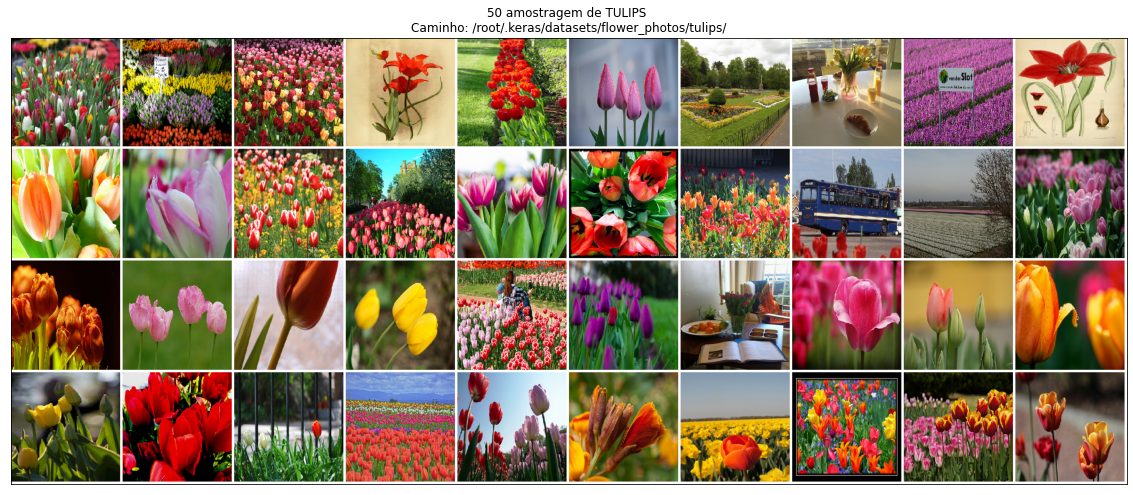

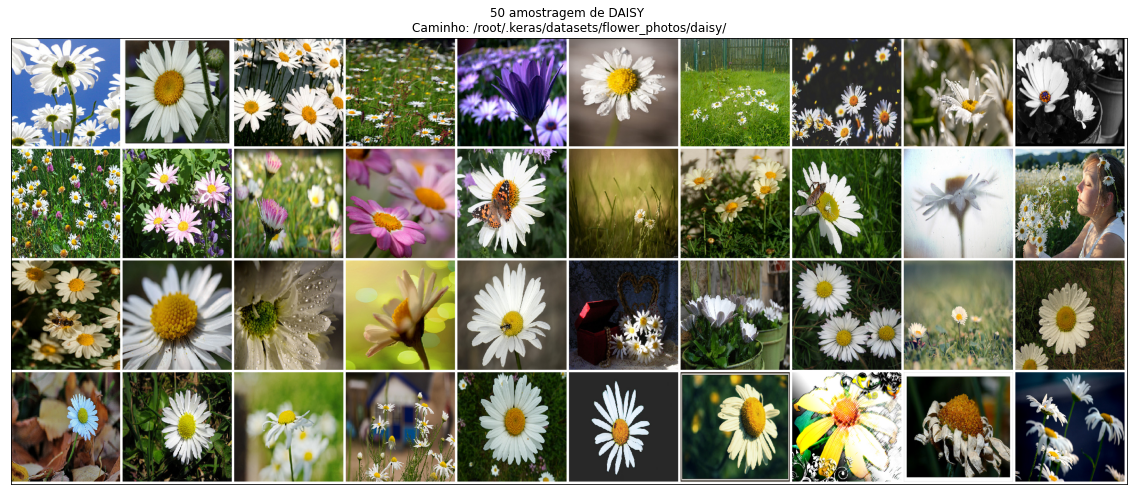

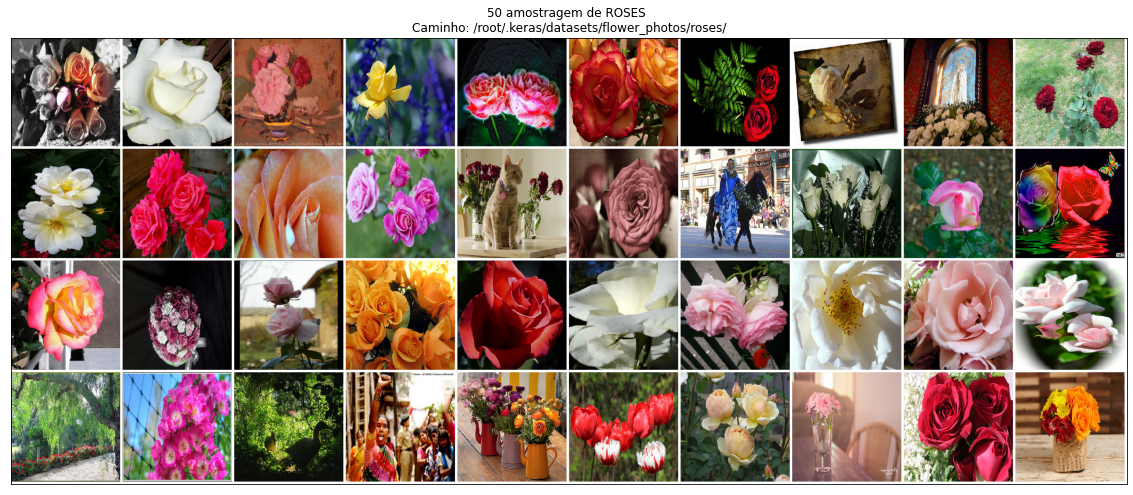

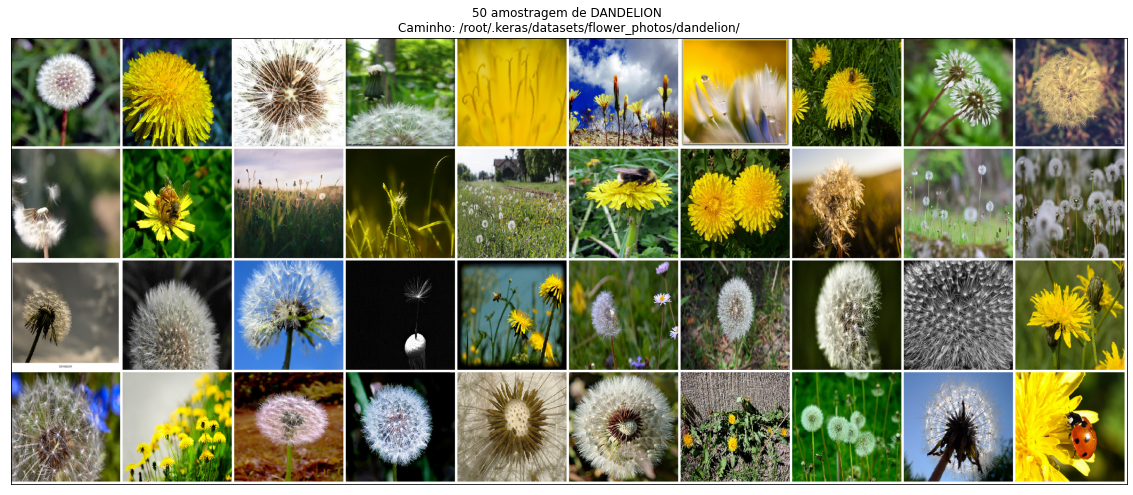

In [11]:
for name in classNames:
  show_flowers(show=name)

In [12]:
keras.backend.clear_session()
batch_size=128
validation_split=0.2
image_width = 224
image_height = 224
dataset_size = int(dataCount-(dataCount*0.2))
validation_size =  dataCount-int(dataCount-(dataCount*0.2))
train_size = dataset_size #dataCount batch_size
 
train_path = "/root/.keras/datasets/flower_photos/"
train_data_generator = ImageDataGenerator(rescale=1./255, 
                                          rotation_range=40,
                                          width_shift_range=0.2,height_shift_range=0.2,
                                          shear_range=0.2,zoom_range=0.2,
                                          fill_mode='nearest',
                                          horizontal_flip=True,validation_split=validation_split)
 
train_datagenerator = train_data_generator.flow_from_directory(train_path,
                                                    target_size=(image_width,image_height ),
                                                    class_mode="categorical",
 
                                                    batch_size=batch_size,
                                                    shuffle=True,
                                                    subset='training')
 
 
val_datagenerator = train_data_generator.flow_from_directory(train_path,
                                                     target_size=(image_width,image_height),
                                                     class_mode="categorical",
                                                     shuffle=True,
                                                     batch_size=batch_size,
                                                     subset='validation')
print(len(classNames))

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
5


In [13]:
validation_size,train_size,dataCount

(734, 2936, 3670)

In [14]:
!ls -l /root/.keras/datasets/flower_photos/tulips/8708856019_f3be235*

-rw-r----- 1 270850 5000 16799 Jan 11  2016 /root/.keras/datasets/flower_photos/tulips/8708856019_f3be2353a4_n.jpg


In [15]:
img = load_img('/root/.keras/datasets/flower_photos/tulips/8708856019_f3be2353a4_n.jpg') 
x = img_to_array(img)
x = x.reshape((1,) + x.shape) 
!rm ./views/*
i = 0
for batch in train_data_generator.flow(x, batch_size=1, save_to_dir='./views', save_prefix='tulips', save_format='jpeg'):
    i += 1
    if i > 20:
      break  #

rm: cannot remove './views/*': No such file or directory


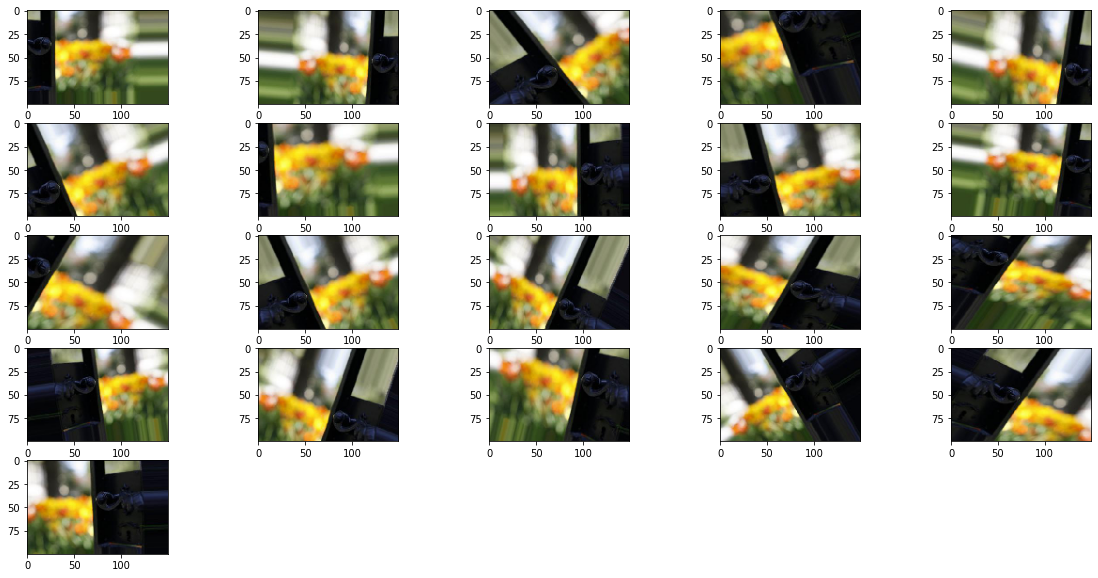

In [16]:
images_path='./views/'
fig = plt.figure(figsize = (20,10))
index = 0    
for path in os.listdir(images_path):
  index += 1
  plt.subplot(5, 5, index)
  test_image = load_img(images_path+path, target_size=(100,150))
  plt.imshow(test_image)
plt.show()

## Modelo

In [17]:
hub_layer =hub.KerasLayer('https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4', trainable=False)

In [18]:
keras.backend.clear_session()
input_shape =  (image_width,image_height,3)
num_classes = len(classNames)
 
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=input_shape))
 
model.add(hub_layer)
 
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(256, activation="relu"))
 
model.add(keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
 
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.RMSprop(lr=0.001, decay = 1e-3, momentum = 0.3), metrics=['accuracy'])

In [19]:
train_size = np.ceil((dataCount*0.8/batch_size)-1)
validation_size = np.ceil((dataCount*0.2/batch_size)-1) 
history = model.fit(train_datagenerator,  steps_per_epoch=train_size,epochs= 10, validation_data=val_datagenerator,validation_steps=validation_size)

Epoch 1/10
22/22 [==============================] - 79s 2s/step - loss: 0.9170 - accuracy: 0.6793 - val_loss: 0.5458 - val_accuracy: 0.8031
Epoch 2/10
22/22 [==============================] - 43s 2s/step - loss: 0.3826 - accuracy: 0.8732 - val_loss: 0.5273 - val_accuracy: 0.8078
Epoch 3/10
22/22 [==============================] - 43s 2s/step - loss: 0.3204 - accuracy: 0.8877 - val_loss: 0.4610 - val_accuracy: 0.8375
Epoch 4/10
22/22 [==============================] - 43s 2s/step - loss: 0.2801 - accuracy: 0.9037 - val_loss: 0.4282 - val_accuracy: 0.8266
Epoch 5/10
22/22 [==============================] - 43s 2s/step - loss: 0.2466 - accuracy: 0.9122 - val_loss: 0.3844 - val_accuracy: 0.8672
Epoch 6/10
22/22 [==============================] - 43s 2s/step - loss: 0.2305 - accuracy: 0.9193 - val_loss: 0.4026 - val_accuracy: 0.8641
Epoch 7/10
22/22 [==============================] - 44s 2s/step - loss: 0.2047 - accuracy: 0.9231 - val_loss: 0.3150 - val_accuracy: 0.8750
Epoch 8/10
22/22 [==

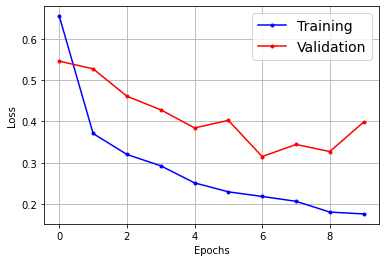

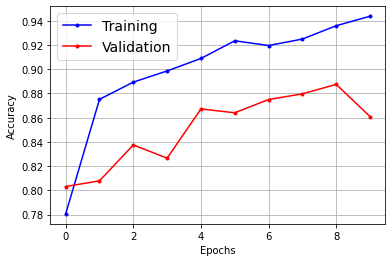

In [20]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(np.arange(len(loss)) , loss, "b.-", label="Training")
plt.plot(np.arange(len(val_loss)) , val_loss, "r.-", label="Validation")
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
 
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(np.arange(len(acc)) , acc, "b.-", label="Training")
plt.plot(np.arange(len(val_acc)) , val_acc, "r.-", label="Validation")
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [21]:
print("Train Accuracy:\t{:.3f}%".format(history.history['accuracy'][-1]*100))
print("Val Accuracy:\t{:.3f}%".format(history.history['val_accuracy'][-1]*100))
print("Train Loss:\t{:.3f}".format(history.history['loss'][-1]))
print("Val Loss:\t{:.3f}".format(history.history['val_loss'][-1]))

Train Accuracy:	94.379%
Val Accuracy:	86.094%
Train Loss:	0.176
Val Loss:	0.399


In [22]:
!rm -rf ./predict
 
tulips  = [
           'https://i.pinimg.com/originals/6a/0b/60/6a0b602378370a64ec1bfdc43f270746.jpg',
           'https://i.pinimg.com/originals/28/ed/49/28ed497e344619fff183780df9385ded.jpg',
           'https://i.pinimg.com/originals/c4/12/3c/c4123ce3395acc8caa717ce573886ebf.jpg',
           'https://i.pinimg.com/originals/44/e6/84/44e684198a6775286109ffb7f1f455b9.jpg', #Daisy
           'https://cdn.shopify.com/s/files/1/1545/7227/products/download-2020-08-22T141025.629_grande.jpg?v=1598130816', #Daisy
           'https://i.ebayimg.com/images/g/FxkAAOSwLrle1PId/s-l300.jpg' #roses
]
!mkdir ./predict
!mkdir ./predict/images
import requests
for i,t in  enumerate(tulips):
  r = requests.get(t)  
  with open('./predict/images/'+str(i)+'.jpg', 'wb') as f:
    f.write(r.content)
!ls -l ./predict/images/

total 76
-rw-r--r-- 1 root root 10852 Apr 26 21:17 0.jpg
-rw-r--r-- 1 root root  9088 Apr 26 21:17 1.jpg
-rw-r--r-- 1 root root 12516 Apr 26 21:17 2.jpg
-rw-r--r-- 1 root root  9733 Apr 26 21:17 3.jpg
-rw-r--r-- 1 root root  7298 Apr 26 21:17 4.jpg
-rw-r--r-- 1 root root 14221 Apr 26 21:17 5.jpg


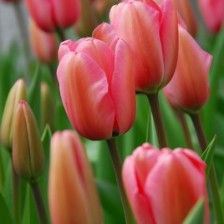

In [23]:
Image.Image.open('./predict/images/1.jpg')

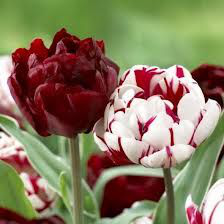

In [24]:
Image.Image.open('./predict/images/0.jpg')

Daisy


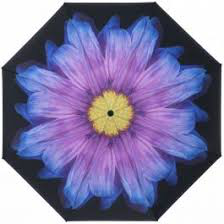

In [25]:
print('Daisy')
Image.Image.open('./predict/images/4.jpg')

Rose


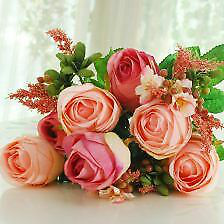

In [26]:
print('Rose')
Image.Image.open('./predict/images/5.jpg')

In [27]:
image_generator = ImageDataGenerator(rescale=1./255)
image_predict = image_generator.flow_from_directory(directory='./predict',batch_size=batch_size,
            shuffle=False,color_mode='rgb',
            target_size=(224,224),
            class_mode=None)

Found 6 images belonging to 1 classes.


In [29]:
!ls -l ./predict

total 4
drwxr-xr-x 2 root root 4096 Apr 26 21:17 images


In [30]:
predicts = model.predict(image_predict)

In [31]:
classes = list(train_datagenerator.class_indices)

Classificação:



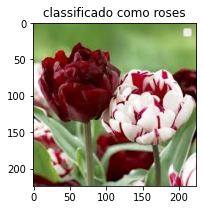

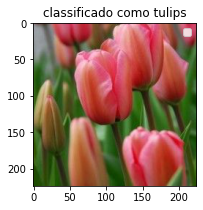

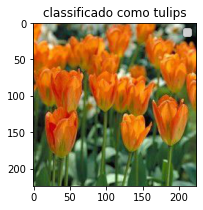

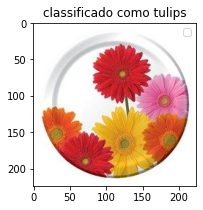

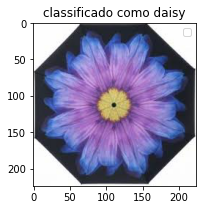

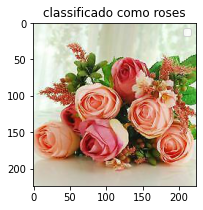

In [32]:
print('Classificação:\n')
index = 0  
for i, p in enumerate(predicts):
  fig = plt.figure(figsize = (5,3))
  plt.imshow(Image.Image.open('./predict/images/'+str(i)+'.jpg'))  
  index += 1
  plt.legend(str(i))
  plt.title('classificado como '+classes[np.argmax(p)])
  plt.show()



